## **K-Means Clustering**

## **Agenda**

In this session, we will cover the following concepts with the help of a business use case:
* K-means clustering
* Deciding optimal number of clusters:
  * Elbow method

Now, let's understand k-means clustering with a use case.

#### <b>Problem Statement: </b>
Lithionpower is the largest provider of electric vehicle batteries.  
It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery from the company. 
Lithionpower has a variable pricing model based on the driver's driving history. Battery life depends on factors like overspeeding, distance driven per day, and so on.

#### <b> Objective: </b>
Create a cluster model where drivers can be grouped together based on their driving data.
Group the data points so that drivers will be incentivized based on the cluster.

#### **Data Dictionary**

For the sake of simplicity, you will take only two features such as mean distance driven per day and the mean percentage of time when a driver was more than 5 mph over the speed limit. 

Here are what the data represent:
* id: Unique ID of the driver 
* mean_dist_day: Mean distance driven by driver per day
* mean_over_speed_perc: Mean percentage of time when a driver was more than 5 mph over the speed limit

#### **Solution**

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In the above code, you are importing the necessary library. Refer to lesson 3 to know about the libraries. 

#### **Import and Check the Dataset**

Now, before reading the data from a csv file, you need to download "driver-data.csv" dataset from the resource section and upload it to the lab.

In [3]:
df = pd.read_csv("driver-data.csv")

In the above code, we are importing the "driver-data.csv" file.

In [4]:
#Check first five rows
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


* In the above code, we are using head function.
* head will show the rows, and () default will take 5 top rows as output.
* Another example - df.head(3) will show top 3 rows.

In [5]:
#Check number of columns and rows, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


* The dataframe's information is printed using the info() function. 

#### **Finding and Treating Null Values**

In [6]:
#Finding count of null values
df.isnull().sum(axis=0)

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

#### **Check Data Types**

In [7]:
df.dtypes

id                        int64
mean_dist_day           float64
mean_over_speed_perc      int64
dtype: object

To check the type of data, you can use dtypes method.

#### **Visualize the Data points** 

Text(0, 0.5, 'mean_over_speed_perc')

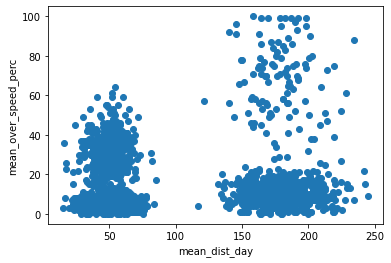

In [8]:
plt.scatter(df['mean_dist_day'],df['mean_over_speed_perc'])
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')

Now we have to cluster the data points that we can group or label in different categories, and this is where K-Means Clustering comes into the picture.


## **K-Means Clustering**

K-means clustering aims to partition **n observations** into **k clusters** in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.


Clusters in "k-means clustering" follow these two underlying rules: 
* The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
* Each point is closer to its own cluster center than to other cluster centers.

## **K-Means: Mathematical Representation**


K-Means objective minimizes the total distortion (sum of distances of points from their cluster centers).

The objective function for k-means is as follows:
$$J(µ,r) = \sum_{n=1}^{N}\sum_{k=1}^{K}r_{nk}||X_n − µ_k ||^2$$

* µ1, . . . , µK are the K cluster centroids (means).
* $r_{nk}$ ∈ {0, 1} are indicators denoting whether point $x_n$ belong to cluster k.

## **K-Means: Expectation–Maximization**

K-Means is a particularly simple and easy-to-understand application of an iterative algorithm known as **Expectation–Maximization**.


The expectation–maximization approach consists of the following procedures:
1. Guess some of the cluster centers
2. Repeat until converged
    * E-Step: Assign points to the nearest cluster center
    * M-Step: Set the cluster centers to the mean

Now, let's see how the algorithm works.




## **K-Means Clustering Algorithm**

* **Step 1**: Start by making a guess on where the central points of each cluster are. Let us call these pseudo-centers, since we do not know yet if they are actually at the center of their clusters.
* **Step 2**: Assign each data point to the nearest pseudo-center. By doing so, we have just formed clusters, with each cluster comprising all data points associated with its pseudo-center.
* **Step 3**: Update the location of each cluster’s pseudo-center, such that it is now indeed in the center of all its members.
* **Step 4**: Repeat the steps of reassigning cluster members (Step 2) and relocating cluster centers (Step 3), until there are no more changes to the cluster membership.

Many clustering algorithms are available in Scikit-Learn and elsewhere, but the simplest to understand is k-means clustering, which is implemented in **`sklearn.cluster.KMeans`**.

In [9]:
from sklearn.cluster import KMeans

You are importing K-means which means k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.

#### **Run the Algorithm with K=3**
Fit the model to all the data, except for the ID label.

In [10]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['mean_dist_day','mean_over_speed_perc']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

#### **Add the Predicted Clusters Column to the Dataset**

In [11]:
df['cluster']=y_predicted
df.sample(5)

,id,mean_dist_day,mean_over_speed_perc,cluster
3331,3423312991,176.30,18,1
2342,3423311342,43.95,5,0
3919,3423311417,152.60,15,1
2909,3423312876,48.95,2,0
3396,3423311235,175.37,18,1


In [12]:
df.cluster.value_counts()

0    3200
1     696
2     104
Name: cluster, dtype: int64

#### **Get the Coordinates of Cluster Centers**

In [ ]:
km.cluster_centers_

#### **Plot the Clusters with their Centroids**

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='green')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='red')
plt.scatter(df3['mean_dist_day'],df3['mean_over_speed_perc'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('mean_dist_da')
plt.ylabel('mean_over_speed_perc ($)')
plt.legend()

## **Decide the Optimal Number of Clusters**

Now, the next question that comes to our mind is how to determine the number of clusters. In our dataset, we got an intuition. However, for a larger dataset, it is hard to determine the number of clusters.

To overcome this shortcoming, there is a method called elbow method.

### **What Is Elbow Method?**



It's a popular technique that involves running k-means clustering for a set of k clusters (let's say 1 to 10) and calculating the sum of squared distances from each point to its assigned center (inertia).

When the inertias are plotted and the plot looks like an arm, the “elbow” (the point of inflection on the curve) is the best value of k.

#### Take k = 1 to 10 and append them in a list

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['mean_dist_day','mean_over_speed_perc']])
    sse.append(km.inertia_)

#### **List Down the Inertias**

In [ ]:
sse

 #### **Plot the Elbow**

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

The point of inflection in the elbow plot is 2, so we know now that the optimal number of the clusters for the data points is 2.

### **Exercise**

* Perform the following on the "diver dataset":
    * Make a k-means clustering model by taking the number of centroid as 2
    * Evaluate the coordinates of the centroids
    * Plot the centroids along with their clustered groups

**Note: In this topic, we saw the use of the k-means clustering method, but in the next topic we will be working on "Hierarchical Clustering".**

![Simplilearn_Logo](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Logo_Powered_By_Simplilearn/SL_Logo_1.png)